In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_validate, cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


%matplotlib inline

In [4]:
# loans_tr 데이터를 load
loans = pd.read_csv('loans_tr.csv')
loans.head()

,Unnamed: 0,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
# Exploratory Data Aanalysis
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8578 entries, 0 to 8577
Data columns (total 15 columns):
Unnamed: 0           8578 non-null int64
credit.policy        8578 non-null int64
purpose              8578 non-null object
int.rate             8578 non-null float64
installment          8578 non-null float64
log.annual.inc       8578 non-null float64
dti                  8578 non-null float64
fico                 8578 non-null int64
days.with.cr.line    8578 non-null float64
revol.bal            8578 non-null int64
revol.util           8578 non-null float64
inq.last.6mths       8578 non-null int64
delinq.2yrs          8578 non-null int64
pub.rec              8578 non-null int64
not.fully.paid       8578 non-null int64
dtypes: float64(6), int64(8), object(1)
memory usage: 1005.3+ KB


In [6]:
# Object type data 
loans_clean = pd.get_dummies(loans)
loans_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8578 entries, 0 to 8577
Data columns (total 21 columns):
Unnamed: 0                    8578 non-null int64
credit.policy                 8578 non-null int64
int.rate                      8578 non-null float64
installment                   8578 non-null float64
log.annual.inc                8578 non-null float64
dti                           8578 non-null float64
fico                          8578 non-null int64
days.with.cr.line             8578 non-null float64
revol.bal                     8578 non-null int64
revol.util                    8578 non-null float64
inq.last.6mths                8578 non-null int64
delinq.2yrs                   8578 non-null int64
pub.rec                       8578 non-null int64
not.fully.paid                8578 non-null int64
purpose_all_other             8578 non-null uint8
purpose_credit_card           8578 non-null uint8
purpose_debt_consolidation    8578 non-null uint8
purpose_educational           8

In [7]:
from sklearn.model_selection import train_test_split
x = loans_clean.drop('not.fully.paid',axis=1)
y = loans_clean['not.fully.paid']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [8]:
del loans_clean['Unnamed: 0']
loans_clean.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [9]:
# Compare Algorithms - model selection
models = []
models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

In [10]:
import warnings
warnings.simplefilter('ignore')

models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, probability=False, random_state=None,
      shrinking=True, tol=0.001, verbose=False)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_d

In [11]:
# cross validaton을 통해 optimal model selection
results = []
names = []
for name, model in models:
    names.append(name)
    score = cross_val_score(model, x_train, y_train, cv=5, scoring = 'accuracy')
    results.append(score)
#     print(results)
    print(name,':', score.mean(), score.std())
    

LR : 0.8391066715987741 0.003416317366574194
SVC : 0.8399401441671597 0.0002598561822992103
KNN : 0.821118047541266 0.003285715212511622
CART : 0.749664934887409 0.010893407328818721
NB : 0.820787625213413 0.006504083008971917
RF : 0.8351084758818565 0.0026166786602524242


[Text(0, 0, 'LR'),
 Text(0, 0, 'SVC'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'CART'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'RF')]

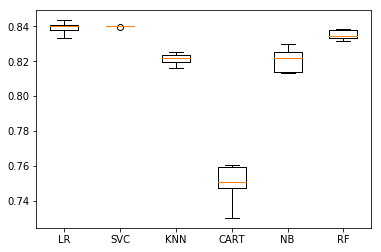

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

In [13]:
# pipeline을 활용해서 scaling하고 optimal model selection
pipelines=[]

pipelines.append(('ScaledLR', Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledSVC', Pipeline([('scaler', StandardScaler()), ('SVC',SVC())])))
pipelines.append(('ScaledKNN', Pipeline([('scaler', StandardScaler()), ('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledDT', Pipeline([('scaler', StandardScaler()), ('DT',DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('scaler', StandardScaler()), ('NB',GaussianNB())])))
pipelines.append(('ScaledRF', Pipeline([('scaler', StandardScaler()), ('RF',RandomForestClassifier())])))


In [14]:
pipelines

[('ScaledLR', Pipeline(memory=None,
           steps=[('scaler',
                   StandardScaler(copy=True, with_mean=True, with_std=True)),
                  ('LR',
                   LogisticRegression(C=1.0, class_weight=None, dual=False,
                                      fit_intercept=True, intercept_scaling=1,
                                      l1_ratio=None, max_iter=100,
                                      multi_class='warn', n_jobs=None,
                                      penalty='l2', random_state=None,
                                      solver='warn', tol=0.0001, verbose=0,
                                      warm_start=False))],
           verbose=False)), ('ScaledSVC', Pipeline(memory=None,
           steps=[('scaler',
                   StandardScaler(copy=True, with_mean=True, with_std=True)),
                  ('SVC',
                   SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                       decision_function_shape='ovr', degree

In [15]:
# cross validaton을 통해 optimal model selection
results = []
names = []
for name, model in models:
    names.append(name)
    score = cross_val_score(model, x_train, y_train, cv=5, scoring = 'accuracy')
    results.append(score)
    print(name,':', score.mean(), score.std())

LR : 0.8391066715987741 0.003416317366574194
SVC : 0.8399401441671597 0.0002598561822992103
KNN : 0.821118047541266 0.003285715212511622
CART : 0.751160910232414 0.01189769947452026
NB : 0.820787625213413 0.006504083008971917
RF : 0.831279718602034 0.006230548507183312


[Text(0, 0, 'LR'),
 Text(0, 0, 'SVC'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'CART'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'RF')]

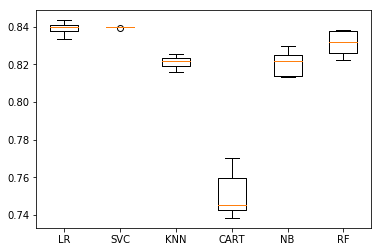

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

In [17]:
# decisiontree

In [18]:
params = {'C':[0.01,0.1,1,10,100],
         'gamma':[0.01,0.1,1,10,100]}
model=SVC()
grid = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5)
grid = grid.fit(x_train, y_train)

In [ ]:
grid.best_score_

0.8399400399733511

In [ ]:
grid.best_params_

{'C': 0.01, 'gamma': 0.01}

In [ ]:
svc = SVC(C= 0.01,gamma= 0.01)

In [ ]:
svc.fit(x_train,y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc.score(x_test, y_test)

0.8414918414918415

In [ ]:
# ensemble 과 grid search를 활용한 model selection

from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), n_estimators=500,
                          learning_rate=0.1)

params = {'base_estimator__criterion': ['gini', 'entropy'],
         'base_estimator__max_features':[7,8],
         'base_estimator__max_depth':[3,5,7],
         'n_estimators': [20,50,100],
         'learning_rate':[0.4, 0.6,0.8]}

grid_adab = GridSearchCV(estimator = adab, param_grid=params, cv=5)
grid_adab.fit(x_train, y_train)


In [ ]:
grid_adab.best_score_

In [ ]:
grid_adab.best_params_

In [ ]:
adab = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion='gini', \
                            max_depth=3, max_features=7), n_estimators=50,
                          learning_rate=0.4)

In [ ]:
adab.fit(x_train, y_train)
adab.score(x_test, y_test)

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier(n_estimators=200, subsample=0.5, max_depth=2, learning_rate=0.55)

params = {'n_estimators': [20, 50, 100],
         'subsample':[0.5],
         'max_depth':[3,5,7],
         'min_samples_leaf': [3,5],
         'max_features':[0.4, 0.6, 0.8, 1.0]}

grid_grb = GridSearchCV(estimator =gbr, param_grid=params, cv=5, n_jobs=-1)
grid_grb.fit(x_train, y_train)

In [ ]:
grid_grb.best_score_

In [ ]:
grid_grb.best_params_

In [ ]:
grb = GradientBoostingClassifier(max_depth = 3, max_features=0.4, \
                    min_samples_leaf=3, n_estimators=50)

In [ ]:
grb.fit(x_train, y_train)
print(grb.score(x_test, y_test))

In [ ]:
# final test score - test data

In [ ]:
loans_ts = pd.read_csv('loans_ts.csv')

y_ts = loans_ts.iloc[:, -1:]
x_ts = loans_ts.iloc[:, :-1]

x_ts = pd.get_dummies(x_ts)

scaler = StandardScaler()
scaler.fit(x_train)
x_ts = scaler.transform(x_ts)

print('rfc :', rfc.score(x_ts, y_ts))
print('adab :', adab.score(x_ts, y_ts))
print('grb :', grb.score(x_ts, y_ts))